In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Standardize the feature data (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

In [52]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [53]:
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

In [54]:
# Cross-validation to assess model performance
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.95238095 0.95238095 0.85714286 1.         0.95238095]
Mean CV Score: 0.9428571428571428


In [55]:
# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

In [56]:
# Evaluate the model
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

In [57]:
print("Best Hyperparameters:", best_params)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'uniform'}

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



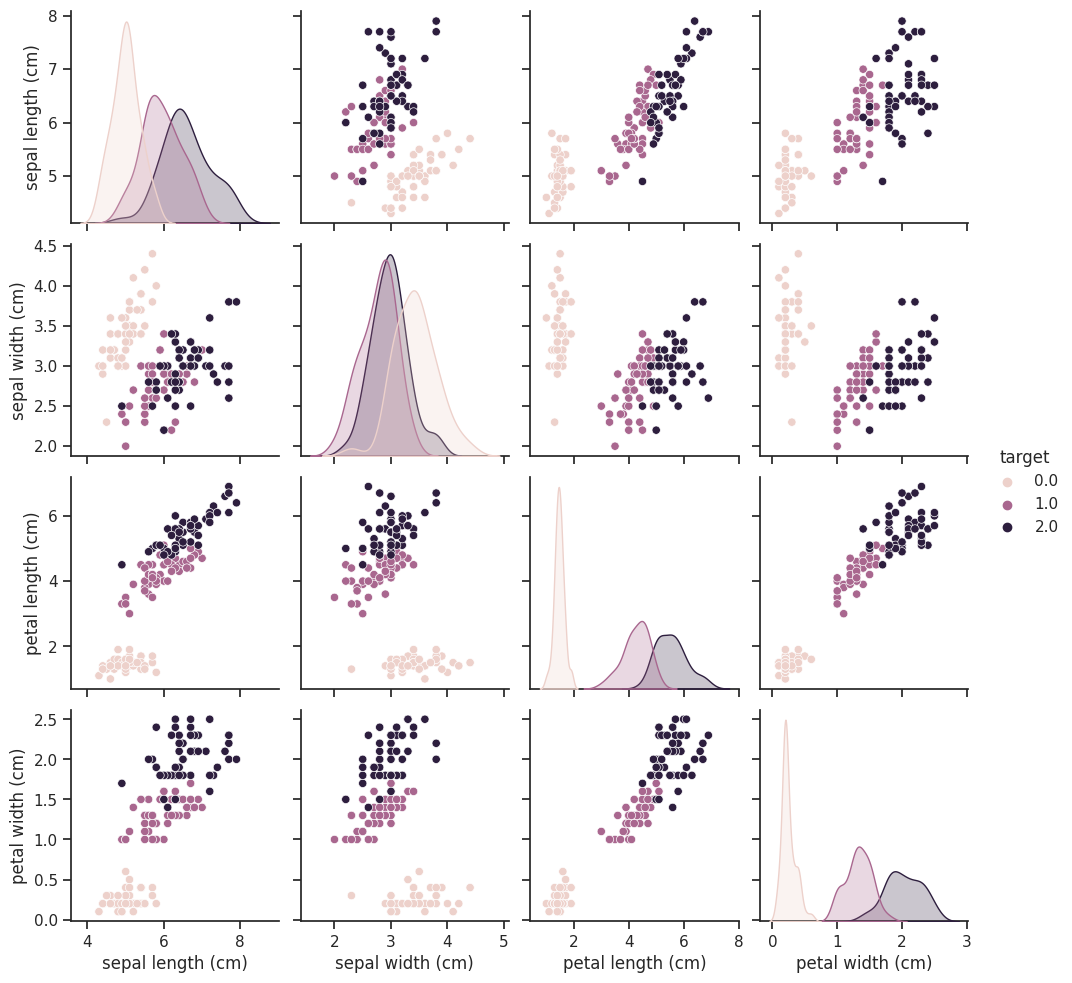

In [58]:
# Visualization: Pairplot for feature visualization
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
sns.set(style="ticks")
sns.pairplot(iris_df, hue='target')
plt.show()